In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [61]:
#read csv file
df = pd.read_csv('data/iris_dump.csv', header=None)
#remove first row
df = df.iloc[1:]
#change data type to float
df = df.astype(float)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)


df


,X0,X1,X2,X3
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [62]:
#number of clusters
k = 3

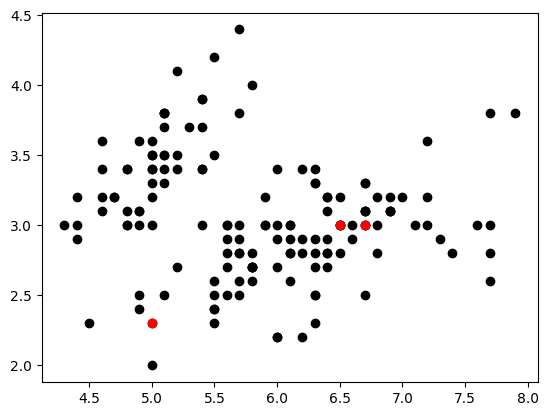

In [63]:
#choose random centroids and delete them from the dataset
centroids = df.sample(n=k)
df_samp = df.drop(centroids.index)


#plot data
plt.scatter(df['X0'], df['X1'], c='black')
plt.scatter(centroids['X0'], centroids['X1'], c='red')
plt.show()

In [64]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5

In [65]:
#assign each point to the closest centroid
def assign(df, centroids):
    if 'cluster' in df.columns:
        df.drop('cluster', axis=1, inplace=True)
    df['cluster'] = df.apply(lambda x: np.argmin([distance(x, centroids.iloc[i]) for i in range(k)]), axis=1)
    return df

In [66]:
assign(df_samp, centroids)


,X0,X1,X2,X3,cluster
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.3,5.7,2.5,2
147,6.3,2.5,5.0,1.9,0
148,6.5,3.0,5.2,2.0,0
149,6.2,3.4,5.4,2.3,2


In [67]:
centroids_new = df_samp.groupby('cluster').mean()
centroids_new

,X0,X1,X2,X3
cluster,,,,
0,6.277778,2.888889,4.822222,1.675556
1,5.182667,3.158667,2.293333,0.569333
2,6.929630,3.088889,5.940741,2.085185


In [68]:
while True:
    #calculate new centroids
    centroids_new = df_samp.groupby('cluster').mean()
    #check if centroids changed
    if centroids.equals(centroids_new):
        centroids_new
        break
    #update centroids
    centroids = centroids_new
    #assign points to new centroids
    assign(df_samp, centroids)
    

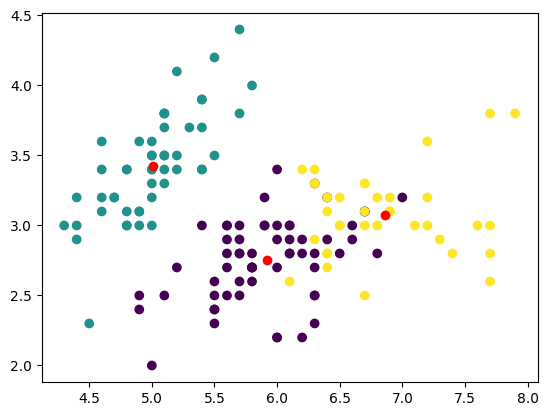

In [69]:
#plot data
plt.scatter(df_samp['X0'], df_samp['X1'], c=df_samp['cluster'])
plt.scatter(centroids['X0'], centroids['X1'], c='red')
plt.show()


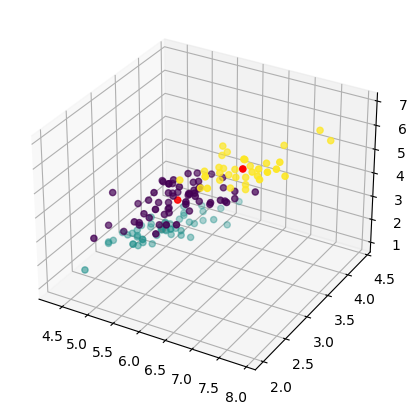

In [70]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_samp['X0'], df_samp['X1'], df_samp['X2'], c=df_samp['cluster'])
ax.scatter(centroids['X0'], centroids['X1'], centroids['X2'], c='red')
plt.show()



In [74]:
#3d scatterplot using plotly

fig = px.scatter_3d(df_samp, x='X0', y='X1', z='X2', color='cluster')
fig.show()
    